# K-Means

## Introdução

Neste notebook iremos estudar outro tipo de problema dentro do aprendizado de máquina, que é o **agrupamento**. Em particular, veremos aqui o modelo **K-Means**, que agrupa os dados a partir de um ponto médio (centroide) de todas as instâncias fornecidas. Com isso, o modelo consegue colocar os pontos em grupos, sem deixar ruídos, isto é, pontos sem classificação.

Usaremos aqui os dados do Iris para implementar o modelo. 

## Dados Iniciais

In [2]:
from pylab import scatter, legend
from sklearn.metrics import confusion_matrix
from sklearn import datasets

iris = datasets.load_iris()

## ```KMeans```

Para invocar a classe ```KMeans```, basta digitar

In [3]:
from sklearn.cluster import KMeans

Assim, dentre os parâmetros qu existem, vamos destacar o ```n_clusters```, que é o número de grupos que queremos criar. No caso do Iris, vamos colocar esse parâmetro igual a 3.

In [4]:
cluster = KMeans(n_clusters = 3)

Para treinar o modelo, usamos o método ```fit```, e colocamos na entrada desse método **apenas** as características dos dados. Isso ocorre pois o intuito do modelo é apenas agrupar os dados, e não classificá-los num determinado resultado.

In [5]:
cluster.fit(iris.data)

KMeans(n_clusters=3)

Além de treinar o modelo, o método também atualiza as variáveis da instância. Dentre elas, destacamos o ```cluster_centers_```, que retorna os centroides de cada grupo, e o ```labels_```, que é um array de uma coluna só dizendo a que grupo cada ponto pertence.

In [6]:
centroides = cluster.cluster_centers_
centroides

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Obs: cada linha é uma coordenada de um centroide. Como temos 3 grupos, então temos 3 linhas. Além disso vale ressaltar que cada coordenada possui 4 componentes pois, lembrando do notebook de KNN, temos 4 características: sepal length, sepal width, petal length, e petal width.

In [7]:
previsoes = cluster.labels_
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

## Precisão do Modelo

Para medir o modelo, vamos usar a matriz de confusão.

In [10]:
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

## Visualização Gráfica do resultado

Como temos 4 características, então vamos selecionar apenas duas para que o gráfico fique em 2D.

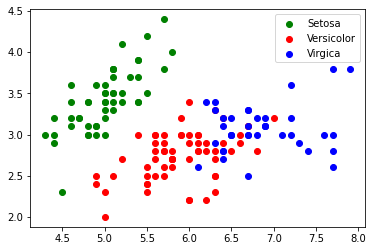

In [12]:
scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1], 
            c = 'green', label = 'Setosa')
scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1], 
            c = 'red', label = 'Versicolor')
scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], 
            c = 'blue', label = 'Virgica')
legend()